<a href="https://colab.research.google.com/github/DanielSFreitas/Store_RFV/blob/main/Store_RFV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Bibliotecas para tratar os dados
import pandas as pd
import numpy as np
import csv

# Bibliotecas para EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para dados
import calendar
from datetime import datetime


# Jupyter Notebook Configuration
sns.set()
import warnings
warnings.filterwarnings("ignore")


# Para localizar o arquivo
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
store = pd.read_csv('/content/drive/MyDrive/CSV/stores_sales_forecasting.csv', encoding='latin-1')
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [7]:
store.shape

(2121, 21)

In [8]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [9]:
store = store.drop('Row ID', axis='columns')
store.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [10]:
store['Order Date']= pd.to_datetime(store['Order Date'])


In [11]:
store['Ship Date']= pd.to_datetime(store['Ship Date'])
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       2121 non-null   object        
 1   Order Date     2121 non-null   datetime64[ns]
 2   Ship Date      2121 non-null   datetime64[ns]
 3   Ship Mode      2121 non-null   object        
 4   Customer ID    2121 non-null   object        
 5   Customer Name  2121 non-null   object        
 6   Segment        2121 non-null   object        
 7   Country        2121 non-null   object        
 8   City           2121 non-null   object        
 9   State          2121 non-null   object        
 10  Postal Code    2121 non-null   int64         
 11  Region         2121 non-null   object        
 12  Product ID     2121 non-null   object        
 13  Category       2121 non-null   object        
 14  Sub-Category   2121 non-null   object        
 15  Product Name   2121 n

In [12]:
store.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [13]:
store['Salesclient'] = store['Sales']*store['Quantity']
store['SalesDiscount']=store['Sales']*store['Discount']*store['Quantity']
store['Salesclient'] = store['Salesclient']-store['SalesDiscount']

store.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Salesclient,SalesDiscount
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.920000,0.000000
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.820000,0.000000
2,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2633.338125,2154.549375
3,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,342.020000,0.000000
4,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,12284.524800,3071.131200


In [14]:
store['Quantile'] = pd.cut(store.Salesclient,5)
store['Percentile_Rank'] = store.Salesclient.rank(pct=True)
store['Rank']= store.Salesclient.rank()

In [15]:
store.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Salesclient,SalesDiscount,Quantile,Percentile_Rank,Rank
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.920000,0.000000,"(-33.907, 6933.434]",0.551862,1170.5
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.820000,0.000000,"(-33.907, 6933.434]",0.831212,1763.0
2,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2633.338125,2154.549375,"(-33.907, 6933.434]",0.860915,1826.0
3,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,342.020000,0.000000,"(-33.907, 6933.434]",0.459217,974.0
4,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,12284.524800,3071.131200,"(6933.434, 13866.11]",0.980198,2079.0


In [16]:
#Criando um dataframe novo, para obter recencia
df_recency = (
    store[["Order Date","Customer ID"]]
    .groupby("Customer ID")["Order Date"]
    .agg("max")
    .reset_index()
)

#Primeiras linhas do novo dataframe
df_recency.head()

,Customer ID,Order Date
0,AA-10315,2014-09-15
1,AA-10375,2015-02-03
2,AA-10480,2016-08-26
3,AA-10645,2016-09-04
4,AB-10015,2016-11-10


In [17]:
#Usaremos a maior data como referência
cur_time = df_recency['Order Date'].max()

#Função para calcular a diferença entre as datas(em meses)
def month_diff(cur_time, datetime_val):
   return 12*(cur_time.year - datetime_val.year)+(
       cur_time.month - datetime_val.month
   )

#Criamos a colunada recencia em meses
df_recency['Recency'] = df_recency['Order Date'].apply(
    lambda datetime_val: month_diff(cur_time, datetime_val)
)

df_recency

,Customer ID,Order Date,Recency
0,AA-10315,2014-09-15,39
1,AA-10375,2015-02-03,34
2,AA-10480,2016-08-26,16
3,AA-10645,2016-09-04,15
4,AB-10015,2016-11-10,13
...,...,...,...
702,XP-21865,2016-08-26,16
703,YC-21895,2014-11-17,37
704,YS-21880,2017-08-18,4
705,ZC-21910,2017-11-06,1


In [18]:
df_recency.describe()

,Order Date,Recency
count,707,707.000000
mean,2017-01-04 07:05:41.159830272,11.338048
min,2014-03-03 00:00:00,0.000000
25%,2016-06-18 12:00:00,2.000000
50%,2017-05-05 00:00:00,7.000000
75%,2017-10-19 00:00:00,18.000000
max,2017-12-30 00:00:00,45.000000
std,NaN,11.184026


In [19]:
df_recency = df_recency.drop("Order Date", axis=1)

In [20]:
df_fm = store[["Customer ID","Order ID", "Salesclient" ]]

#Contamos os pedidos e pegamosa media de gasto por compra
df_fm = (
      df_fm.groupby("Customer ID")[["Order ID", "Salesclient"]].
      agg({
          "Order ID":"count",
          "Salesclient":"mean"

      }).reset_index())

df_fm = df_fm.rename(
    columns={
        "Order ID":"Frequency",
        "Salesclient":"Monetary"
    }
)

#Arredonda os valores

df_fm.Monetary = df_fm.Monetary.round(2)

df_fm.head()

,Customer ID,Frequency,Monetary
0,AA-10315,1,29.12
1,AA-10375,1,56.80
2,AA-10480,2,923.14
3,AA-10645,8,1976.72
4,AB-10015,2,361.44


In [21]:
df_rfv = df_recency.merge(df_fm, on="Customer ID", how="left")
df_rfv = df_rfv.fillna(0)
df_rfv.head()

,Customer ID,Recency,Frequency,Monetary
0,AA-10315,39,1,29.12
1,AA-10375,34,1,56.80
2,AA-10480,16,2,923.14
3,AA-10645,15,8,1976.72
4,AB-10015,13,2,361.44


In [22]:
df = df_rfv.copy()
df.drop(columns=['Customer ID'], inplace=True)


In [23]:
#Carrega biblioteca de scaling
from sklearn.preprocessing import StandardScaler

# Separa as colunas do modelo
feature_cols = ['Recency', 'Frequency', 'Monetary']

#Cria uma copia do dataframe original
standardized_data = df_rfv.copy()

#Instancia o scaler
scaler = StandardScaler()

#Treina o algoritmo nos dados originais
scaler.fit(df_rfv[feature_cols])

#Aplica a transformação e aloca as features no dataframe copia
standardized_features = scaler.transform(df_rfv[feature_cols])
standardized_data[feature_cols] = standardized_features

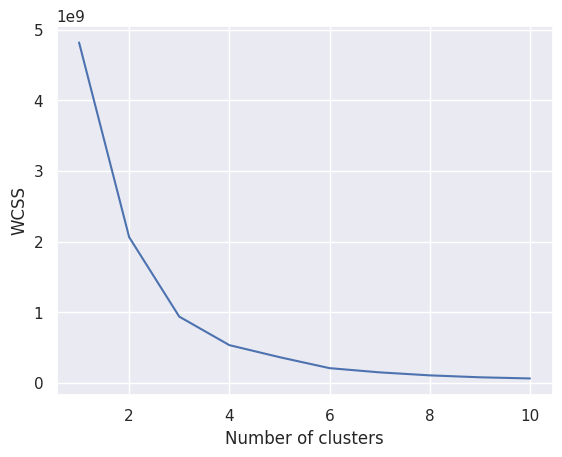

In [24]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
from sklearn.cluster import KMeans
# Treina com 3 clusters
kmeans= KMeans(n_clusters=3)
kmeans.fit(standardized_data[feature_cols])

#Atribui os rótulos aos indivíduos
df_rfv["Cluster"] = kmeans.labels_

#Verifica o dataframe com cluster adicionado
df_rfv.head()

,Customer ID,Recency,Frequency,Monetary,Cluster
0,AA-10315,39,1,29.12,2
1,AA-10375,34,1,56.80,2
2,AA-10480,16,2,923.14,2
3,AA-10645,15,8,1976.72,1
4,AB-10015,13,2,361.44,2


In [26]:
# Vamos verificar as metricas por cluster
centroid_df= (
    df_rfv.groupby("Cluster")
    [["Customer ID", "Recency", "Frequency", "Monetary"]]
    .agg(
        {
            "Customer ID":"nunique",
            "Recency": "mean",
            "Frequency": "mean",
            "Monetary":"mean",
        }
    )
    .reset_index()
)

#Renomeamos a feature CustomerID
centroid_df = centroid_df.rename(columns={"Customer ID": "N_Buyers"})

# Vamos ordenar por recencia
centroid_df.sort_values(by="Recency", ascending=True)

,Cluster,N_Buyers,Recency,Frequency,Monetary
1,1,453,4.933775,3.673289,1227.290883
0,0,29,17.103448,2.137931,11051.382414
2,2,225,23.488889,1.755556,1114.308578


In [27]:
#Nomeando os grupos
seg_map =[
  "Cliente Assíduo",
  "Cliente Premium",
  "Risco de Perda",
]

centroid_df['Segment'] = seg_map
centroid_df

,Cluster,N_Buyers,Recency,Frequency,Monetary,Segment
0,0,29,17.103448,2.137931,11051.382414,Cliente Assíduo
1,1,453,4.933775,3.673289,1227.290883,Cliente Premium
2,2,225,23.488889,1.755556,1114.308578,Risco de Perda
